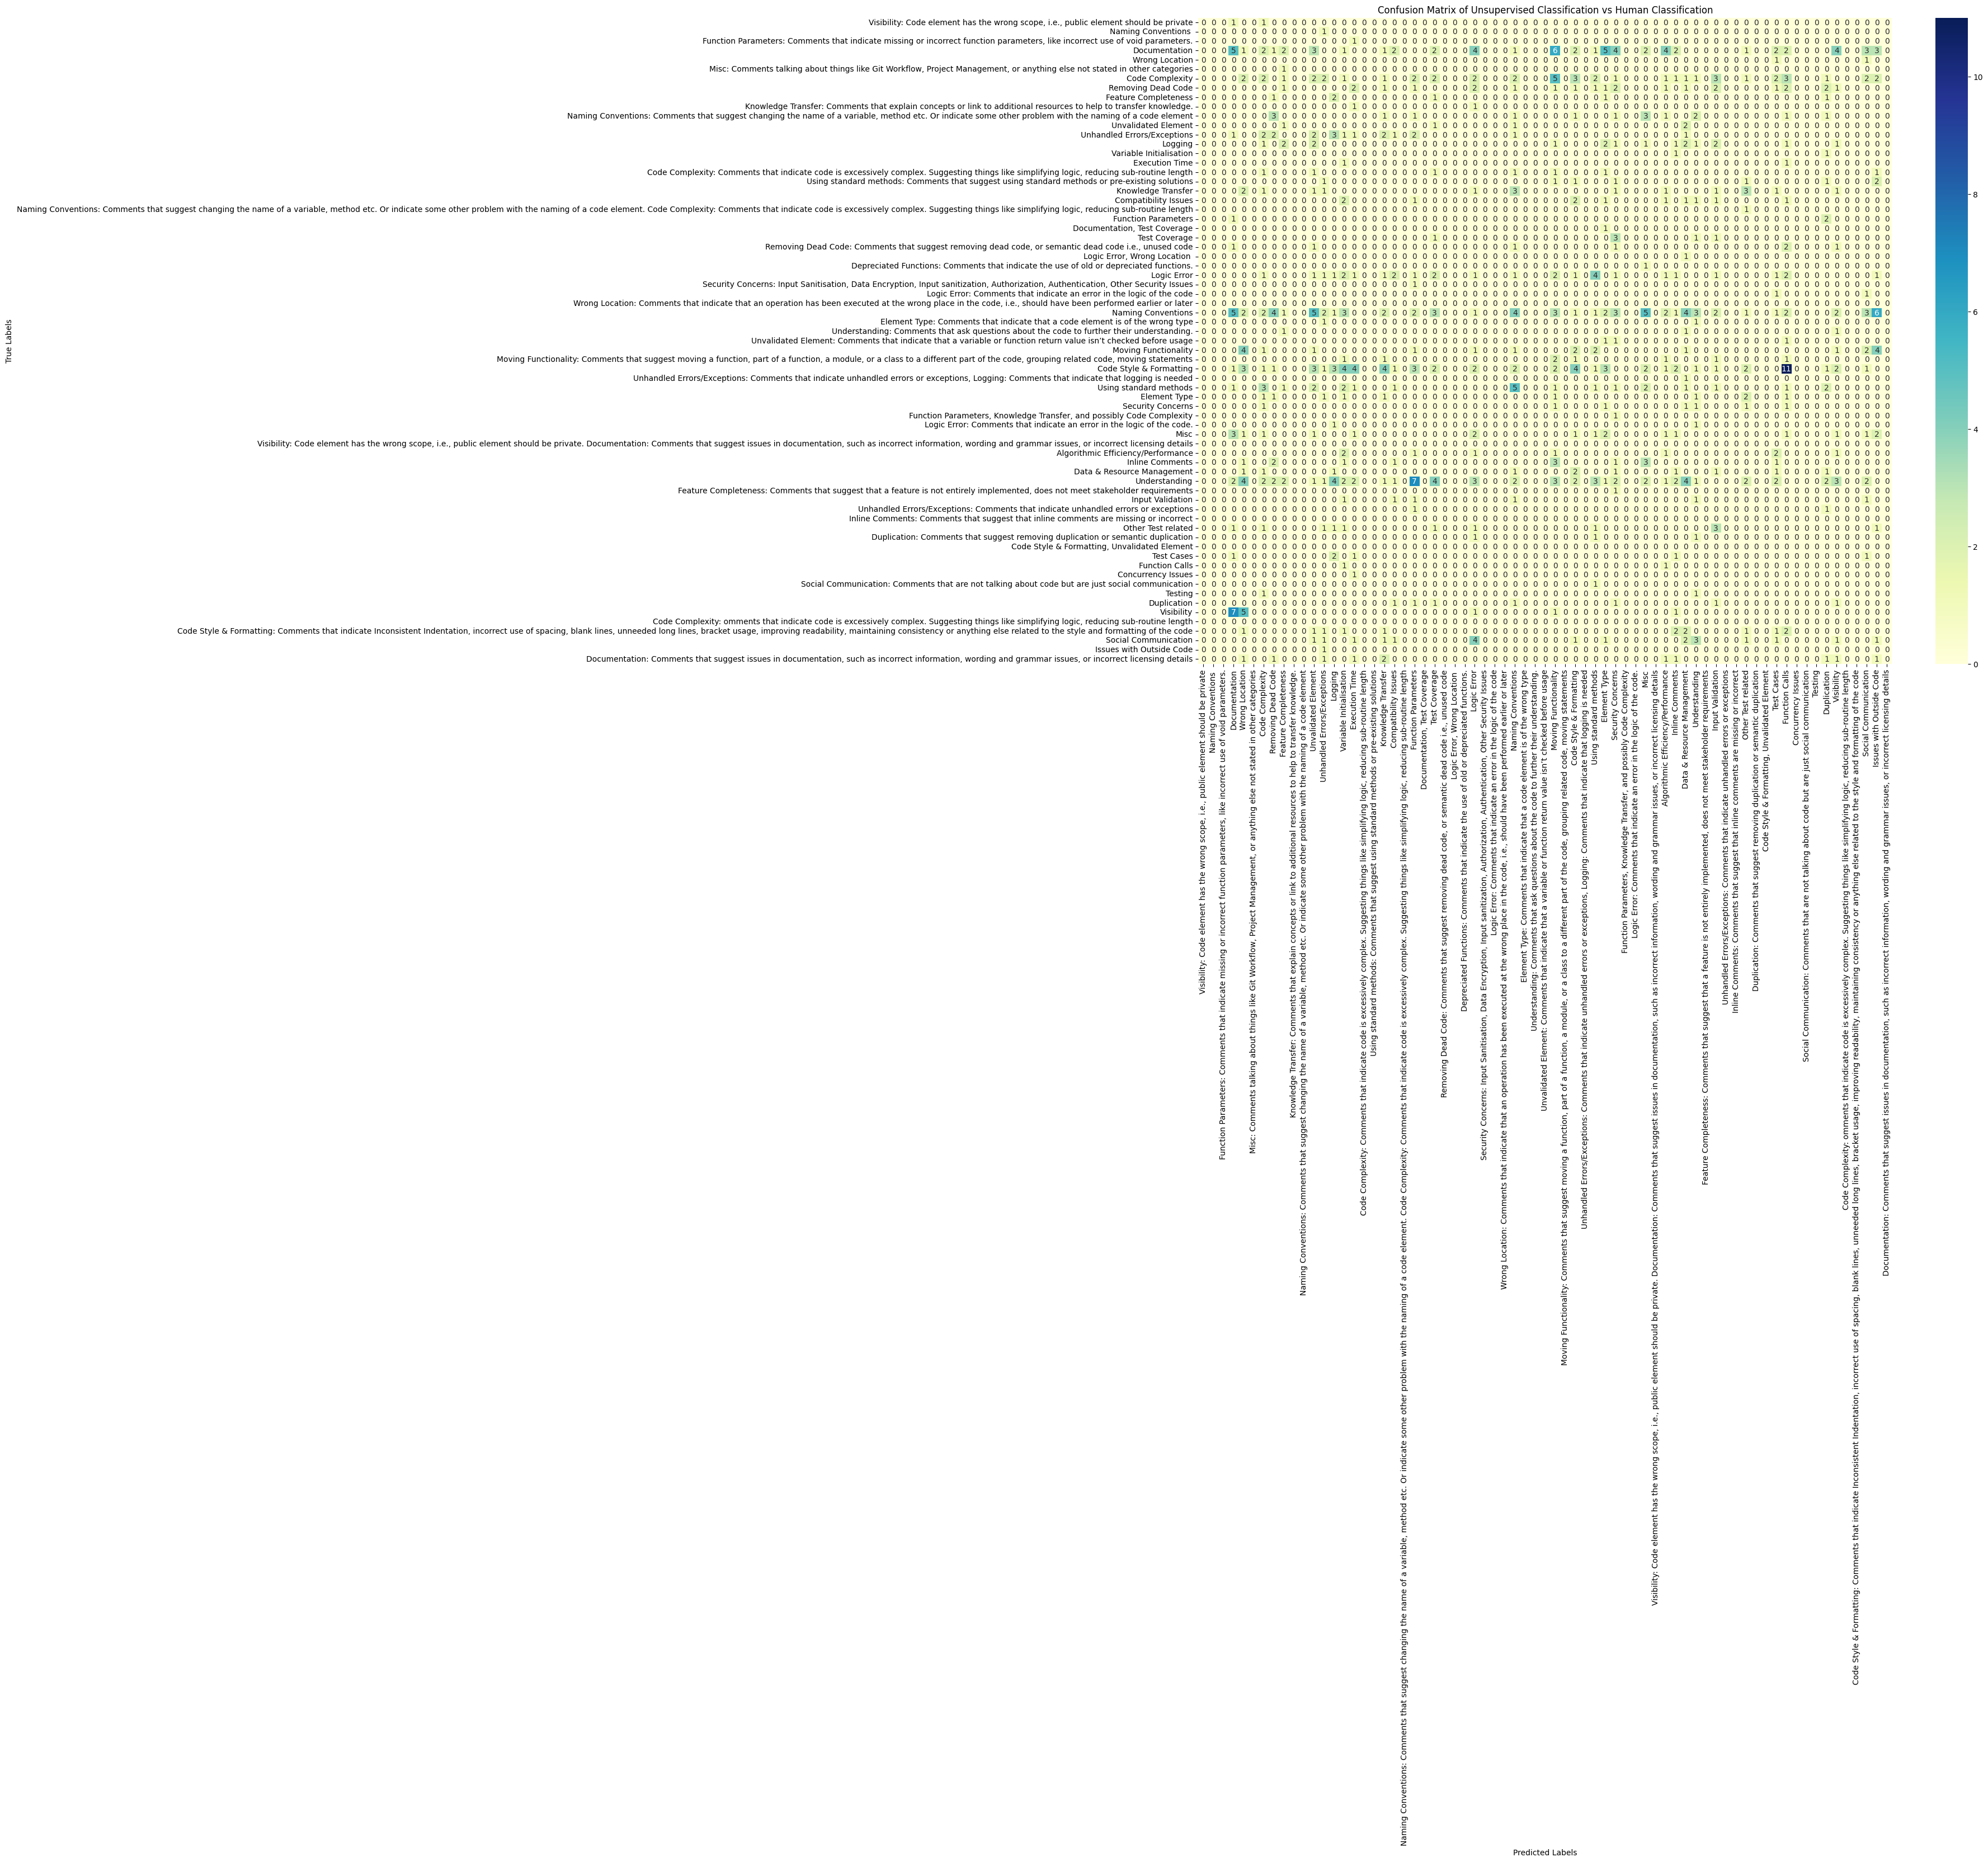

In [2]:
# Import necessary libraries
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Load data
with open("HAO_comment_classification.json", "r") as file:
    human_classified_data = json.load(file)

with open("availability_comment_classification_with_topics.json", "r") as file:
    unsupervised_classified_data = json.load(file)

# Function to extract the category with the highest weight
def extract_top_category(classification):
    return max(classification, key=lambda x: x[1])[0]

# Prepare classification lists
human_classifications = [item['Comment Classification'] for item in human_classified_data]
unsupervised_classifications = [extract_top_category(item['Comment Classification']) for item in unsupervised_classified_data]

# Compute confusion matrix
confusion_mat = confusion_matrix(human_classifications, unsupervised_classifications, labels=list(set(human_classifications)))

# Create a DataFrame of the confusion matrix
confusion_df = pd.DataFrame(confusion_mat, index=list(set(human_classifications)), columns=list(set(human_classifications)))

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(confusion_df, annot=True, cmap="YlGnBu")
plt.title('Confusion Matrix of Unsupervised Classification vs Human Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()